> Licensed under the MIT License  
> © 2026 Ariel N. Olsen

## Exploratory Data Analysis (EDA)

#### **Goal:** 

_Understand the structure, distribution, and relationships within the Spotify audio feature dataset prior to modeling._

## **Section 1: Introduction and Problem Statement**

### **1.1 Overview**

This project explores a supervised machine learning approach for predicting a song's popularity score based on a variety of audio and musical features. Because song popularity is measured as a continuous variable ranging from 0 to 100, the problem will be framed as a regression task. The "_Spotify Tracks Dataset_" from Kaggle includes attributes such as danceability, energy, loudness, tempo, valence, acousticness, and other engineered audio features that collectively characterize a song's composition and listener appeal.

This analysis builds on _Cognify_, a mood-based music recommendation project originally developed for a Data Mining course (DTSA 5506). Cognify explored patterns in musical features and examined how songs relate to one another within a seed playlist to generate song recommendations. In this final project, the foundation for Cognify is extended by applying supervised learning methods to predict a song's popularity using the _Spotify Tracks Dataset_.

Please find this Jupyter Notebook, presentation slides, and dataset in my GitHub:

<https://github.com/aolsen13/IntrotoMachineLearningFinalProject/tree/main>

### **1.2 Problem Statement**

Below, we investigate whether a song's popularity can be accurately predicted using measurable audio features. The _Spotify Tracks Dataset_ contains track-level attributes (danceability, energy, loudness, acousticness, valence, speechiness, and tempo). Each feature measures a specific musical and acoustic characteristic. The target variable is a continuous popularity score ranging from 0 to 100, framing this as a supervised regression prolem.

Predicting the poularity of a song is incredibly useful for music-streaming platforms and artists seeking to understand which musical elements contribute most to listener engagement. Because popularity may depend on complex and potentially linear relationships among many audio features, machine learning provides an effective approach for building a predictive model and analyzing how features influence one another.

### **1.3 Dataset Description**

"_Spotify Tracks Dataset_" is public dataset sourced from Kaggle and contains track-level information for thousands of songs. The original data is from the _Spotify_ music-streaming platform; however, there is a limitation in the number of songs that can be "pulled" through their API (_50 tracks at a time_). This dataset will serve as a substitute for the data that would be provided via the _Spotify_ web APIs.

All audio features in this dataset are numeric and can be used for regression. Each row of this dataset represents a single song, with columns including attributes such as danceability, energy, loudness, etc. The target variable for this project will be **popularity**, a continuous score between 0 and 100 reflecting how widely the track is streamed.

### **1.4 Project Goals**

This project aims to achieve the following goals:

1. Perform comprehensive exploratory analysis (EDA) to characterize the dataset and assess features distribution, correlations, and potential preprocessing needs.
2. Investigate how individual audio features relate to the target variable, **popularity**, and identify meaningful patterns or dependencies.
3. Develop a suite of regression models (_including Linear, k-Nearest Neighbors and Decision Tree Regressions_) to evaluate different supervised learning approaches.
4. Asses model performance using appropriate evaluation metrics and compare model stregths, weaknesses, and generalization ability.
5. Determine which audio features have the greatest influence on popularity predicitions, providing insight into the factors that drive listener engagement.

## **Section 2: Project Set-up**

### **2.1 Import Libraries**

These libraries support the machine workflow for this project: data loading, cleaning/ EDA, visualization, model development, and evaluation. _Scikit-learn_ tools reviewed during lecture and applied in the assessments for this course for model training, hyperparameter tuning, preprocessing, and computing regression metrics _(RMSE, MAE, and R-squared)_.

The following libraries will be used throughout the project to support the Project Goals listed in Section 1.4.

In [7]:

#Libraries used for core data handling.
import numpy as np
import pandas as pd

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Model selection and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Regression models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree

#Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Debugging and stylization
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')


### **2.2 Load Dataset**

The first step in this analysis is to load the _Spotify Tracks Dataset [1]_ sourced from _Kaggle_ into the dataframe via pandas. Doing so allows for efficient inspection, cleaning, and manipulation of the data structure. Viewing the first few rows helps verify the correct data was imported as expected, and provides an initial understanding of the features provided in the dataset.




_[1] Zaheen Hamidani. 2019. Ultimate Spotify Tracks Dataset. Kaggle. Available at https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db (Accessed September 13, 2025)._

In [8]:
df = pd.read_csv("SpotifyTracksDataset.Popular.csv", encoding='cp1252')

df.head()

,genre,artist_name,track_name,track_id,popularity,seed_key,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Children's Music,Neva Eder,Pat-a-cake,3WD0pKwRzP3cIlLu5upr0n,0,70856,0.509,0.766,15387,0.5380,0.000001,-1,0.131,-15.830,1,0.8800,92.912,0.00,0.000
1,Classical,George Frideric Handel,"Rinaldo, HWV 7a, Act I (Ed. G. Sechi): Questi ...",6TLQnTsEA4dC2tnrw90oXj,0,92679,0.969,0.562,15509,0.1250,0.001380,2,0.373,-15.449,2,0.2010,115.827,5.00,0.574
2,Classical,Johann Sebastian Bach,"St. John Passion, BWV 245, Pt. 2: No. 25c, Pil...",59WZFyp8hKSPBCc9rG8Ooa,0,85280,0.914,0.588,16316,0.1650,0.000000,4,0.233,-26.286,1,0.2370,104.678,1.00,0.000
3,Rock,Solange,S McGregor (interlude),6vOnTS8EhcUqvaRwsV2Dfn,18,71033,0.922,0.422,16640,0.3210,0.000003,3,0.179,-15.381,1,0.3040,176.961,5.00,0.361
4,Classical,Johann Sebastian Bach,"St. John Passion, BWV 245, Pt. 2: No. 21a, Und...",1biRN2dfC79PH6p5ckUfTX,0,85373,0.954,0.532,16748,0.0639,0.000000,-6,0.593,-25.800,1,0.0519,126.447,0.25,0.000


## **Section 3: Exploratory Data Analysis (EDA)**

### **3.1 Dataset Checks**

**3.1.1 Dataset Structure and Dimensions**

The overall size and layout of the dataset were examined:

- _**df.shape**_ reports the number of observations and features, giving a high-level sense of the dataset and complexity.
- _**df.columns**_ provides a list of attribute names, confirming the expected structure and confirming the names of each variable in the dataset.

In [9]:
df.shape

(176561, 19)

In [10]:
df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'seed_key', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

**3.1.2 Assess for Missing Values**

This identifies the total number of missing entries per feature. Understanding the distribution of missing values is essential for determining feature removal or if additional data-cleaning strategies are necessary before completing additional analysis.

As mentioned above, this dataset was previously used in a Data Mining project. This missing values audit showed one missing value (_in track_name_), allowing the analysis to proceed without additional data cleanse.

In [11]:
df.isnull().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
seed_key            0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

**3.1.3 Summary Statistics of Dataset**

A summary of the dataset's statistics provides insight into each numerical feature's central tendency, dispersion, and range. These statitics help identify potential outliers, irregular distributions, scale differences that may require normalization or standardization, and is an early indication of how features may related to the target variable (_**popularity**_).

The summary below indicates that many features span wide ranges and exhibit substantial variability, suggestion the dataset captures diverse genres, production styles, and recording characteristics.

In [12]:
df.describe()

,popularity,seed_key,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,176561.000000,176561.000000,176561.000000,176561.000000,1.765610e+05,176561.000000,176561.000000,176561.000000,176561.000000,176561.000000,176561.000000,176561.000000,176561.000000,176561.000000,176561.000000
mean,36.266922,88281.000000,0.404253,0.541062,2.361433e+05,0.556933,0.172155,1.426357,0.224581,-10.140612,1.340290,0.127441,117.198825,1.060938,0.451604
std,17.388435,50968.914777,0.366355,0.190422,1.305656e+05,0.275856,0.323000,4.328763,0.211093,6.397059,0.473808,0.204427,31.325765,0.642337,0.267837
min,0.000000,1.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,-7.000000,0.009670,-52.457000,1.000000,0.022200,30.379000,0.000000,0.000000
25%,25.000000,44141.000000,0.045600,0.415000,1.782420e+05,0.343000,0.000000,-3.000000,0.097500,-12.855000,1.000000,0.036800,92.005000,1.000000,0.222000
50%,37.000000,88281.000000,0.288000,0.558000,2.194660e+05,0.592000,0.000071,3.000000,0.130000,-8.195000,1.000000,0.049400,115.005000,1.000000,0.440000
75%,49.000000,132421.000000,0.791000,0.683000,2.685730e+05,0.789000,0.091100,5.000000,0.277000,-5.632000,2.000000,0.102000,138.791000,1.000000,0.667000
max,100.000000,176561.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,7.000000,1.000000,3.744000,2.000000,0.967000,242.903000,5.000000,1.000000


### **3.2 Target Variable Exploration: _Popularity_**

To better understand the behavior of the target variable, a histogram with KDE overlay was generated to visualize the distribution of song popularity scores. The distribution reveals several important characteristics relevant to model development.

First, _**popularity**_ is not uniformly distributed. Instead, there is a concentration of tracks around 20-50 popularity core, with the highest density around the mid-30s. This aligns with the summary statistics above showing a mean popularity score of 36. The distribution slopes sharply at popularity = ~60, indicating that high-popularity tracks are relatively rare in this particular dataset.

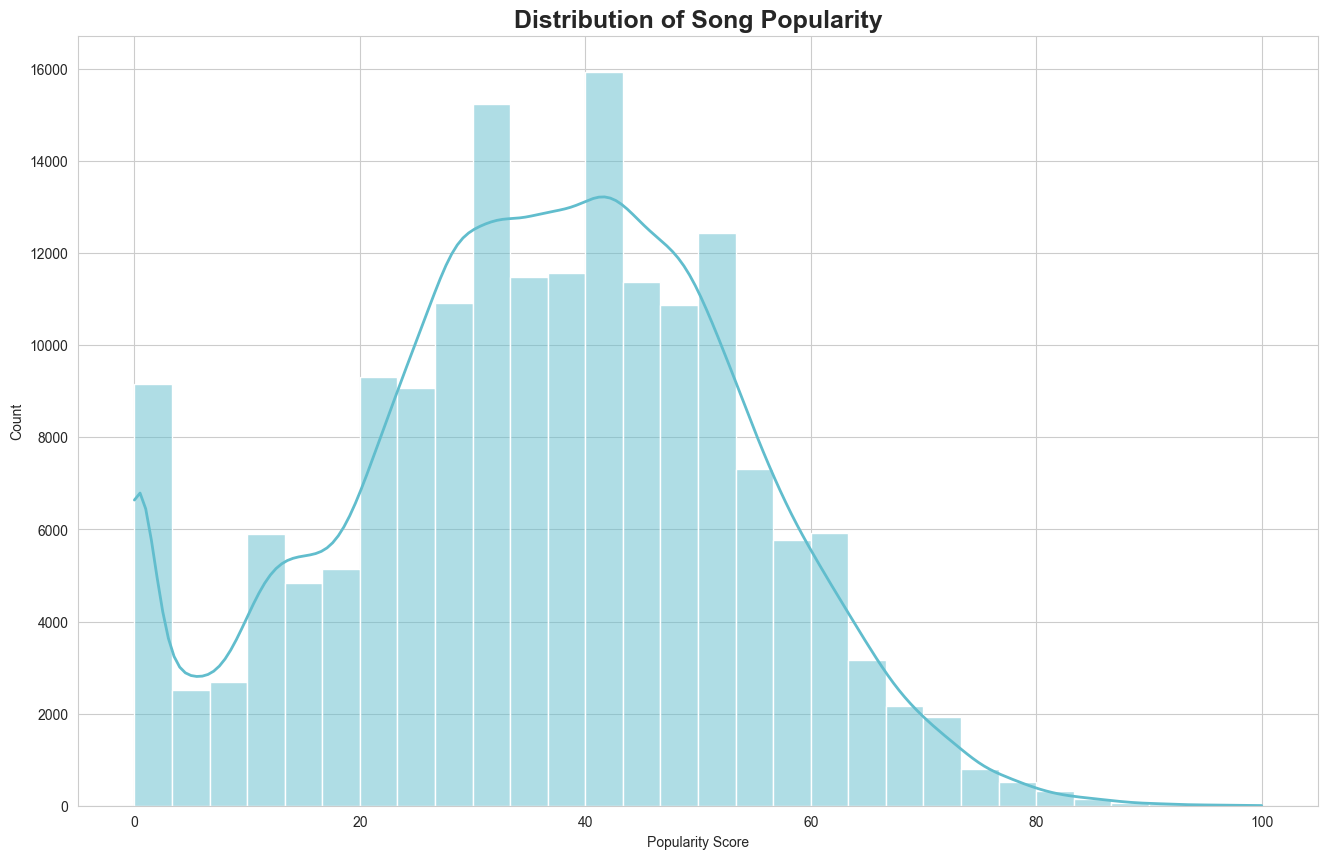

In [13]:
plt.figure(figsize = (16, 10))

sns.histplot(df['popularity'], bins=30, kde=True, color = sns.color_palette("GnBu", 6)[3], 
             line_kws={'color': sns.color_palette("GnBu", 6)[5], 'linewidth': 2})

plt.title("Distribution of Song Popularity", fontsize = 18, fontweight = "bold")
plt.xlabel("Popularity Score")
plt.ylabel("Count")
plt.show()

### **3.3 Feature Distribution**

The histograms below provide a visual overview of the underlying structure of the _Spotify Tracks Dataset._ These feature distributions reveal meaningful patterns in how musical attributes vary across tracks and offer important guidance for downstream preprocessing and model development. Several features exhibit wide variation, skewness, or multi-modal patterns, while others appear to be encoded categorical variables rather than true continuous measurements. Additionally, most continuous features exist on different scales, underscoring the necessity for normalization/ standarization of the dataset priort to modeling, as well as the assessing which columns could be dropped prior to modeling.


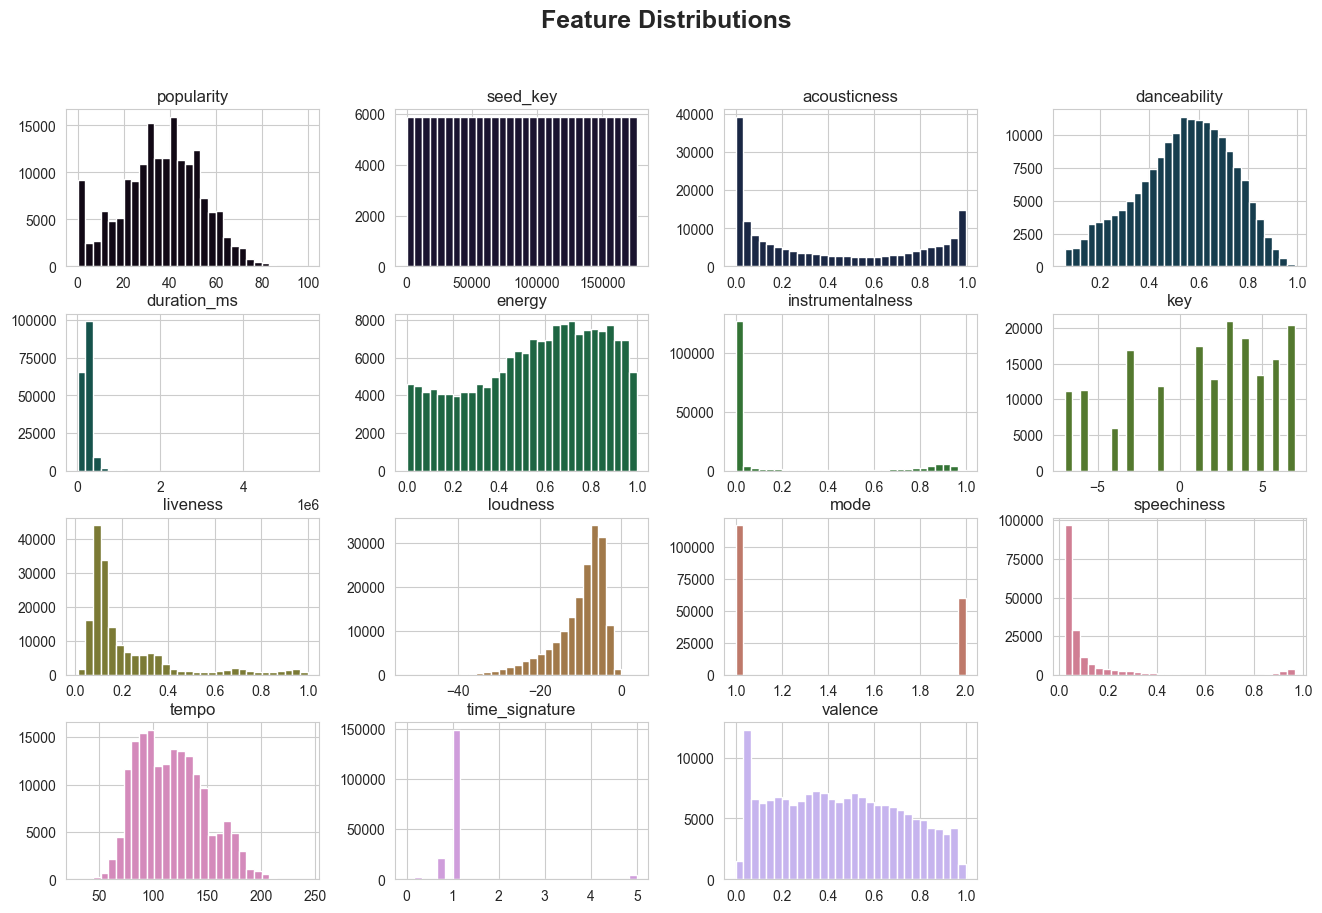

In [14]:
colors = sns.color_palette("cubehelix", len(df.columns))

axes = df.hist(figsize = (16, 10), bins = 30)

axes = axes.flatten()

for ax, color in zip(axes, colors):
    for patch in ax.patches:   
        patch.set_facecolor(color)

plt.suptitle("Feature Distributions", fontsize = 18, fontweight = "bold")
plt.show()

### **3.4 Correlation Matrix and Heatmap**

A correlation matrix was generated to examine the linear relationships between the numerical features in the dataset and identify which attributes may hold predictive value for modeling song popularity. The correlation structure of the dataset overall reveals generally weak to moderate relationship among most features, indicate that the dataset does not contain strong collinearity and many features contribute unique information.

With respect to the target variable (_**popularity**_), the correlations are relatively modest. Features attributed to audio qualities, such as danceability, energy, and valence show mild positive associations with popularity, suggesting more energetic and positive-sounding tracks tend to be more popular. Instrumentalness shows a negative correlation, indicating the purely instrumental music - regardless of genre - is typically less popular.

The correlation heatmap suggests that while no single feature strongly predicts popularity on its own, several audio attributes provide complementary information that can be combined to improve predictive performance.

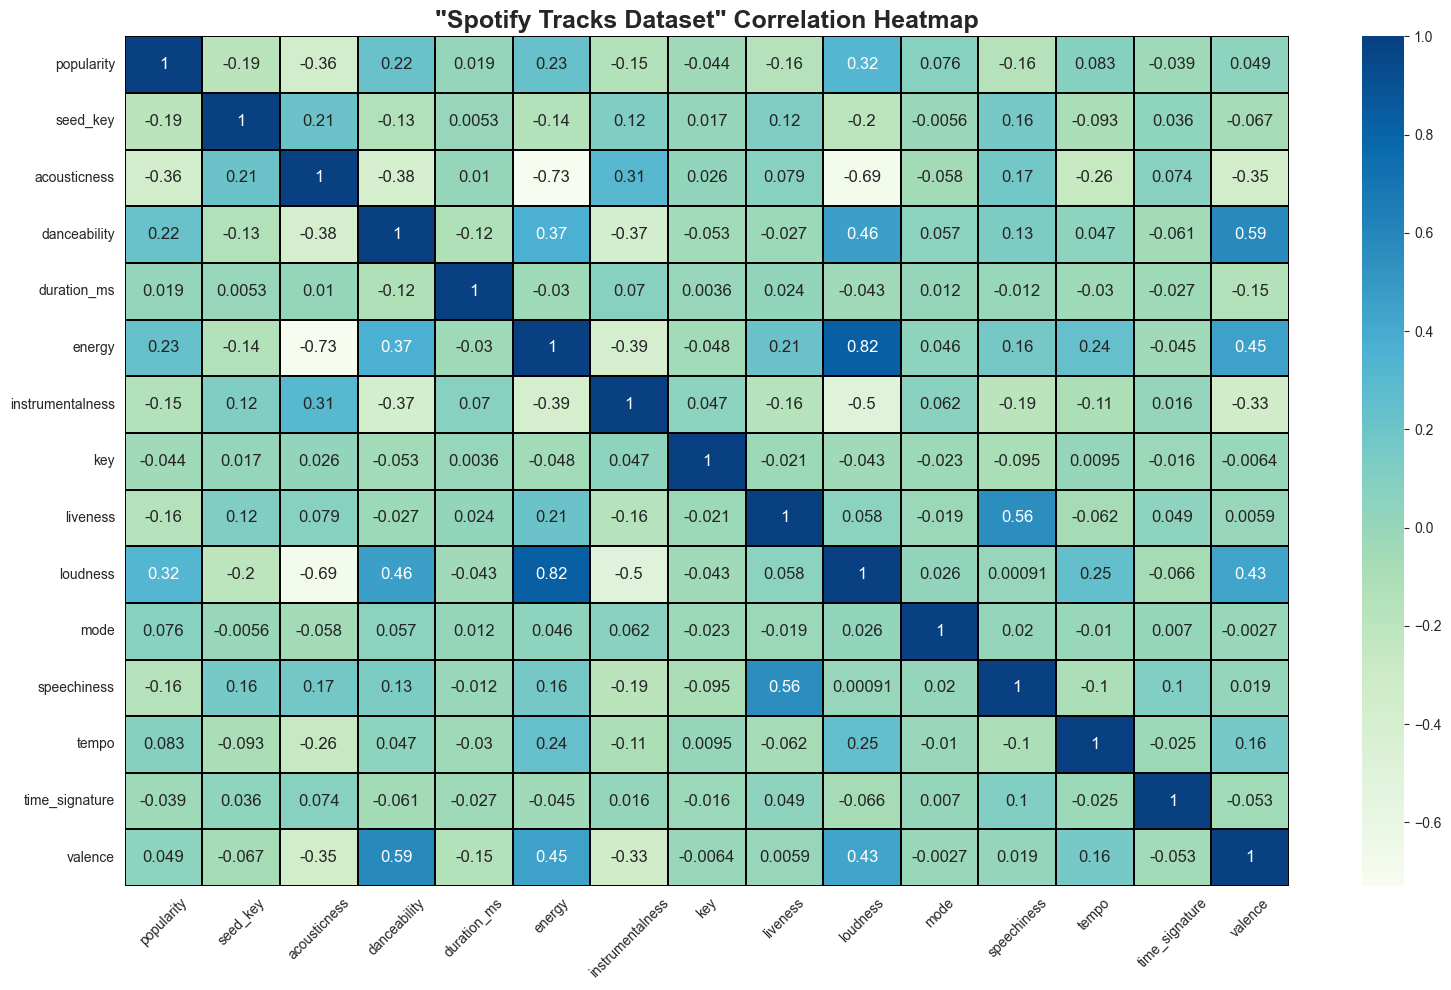

In [15]:
corr = df.select_dtypes(include = "number").corr()

fig, ax = plt.subplots(figsize = (16, 10))

sns.heatmap(corr,
            cmap = "GnBu",
            annot = True,
            annot_kws = {"size": 12},
            linewidths = 0.25,
            linecolor = "black",
            ax = ax)

ax.set_title('"Spotify Tracks Dataset" Correlation Heatmap', fontsize = 18, fontweight = "bold")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()